In [1]:
#Data Modulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Machine Learning Packages
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
from sklearn.utils import resample

"""#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

#Deep learning
import tensorflow as tf

#for saving model in last step
import joblib"""

'#Models\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.ensemble import ExtraTreesClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import VotingClassifier\n\n#Deep learning\nimport tensorflow as tf\n\n#for saving model in last step\nimport joblib'

## Loading data

In [2]:
pd.pandas.set_option("display.max_columns",None) # to see all the columns

df = pd.read_csv("customer_retention_data.csv")
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

## Check & Manipulate the Data

In [3]:
df.shape

(269, 71)

In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [6]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [7]:
df.nunique()

1Gender of respondent                                                    2
2 How old are you?                                                       5
3 Which city do you shop online from?                                   11
4 What is the Pin Code of where you shop online from?                   39
5 Since How Long You are Shopping Online ?                               5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [8]:
x = df.drop(["1Gender of respondent"],axis=1)
y = df["1Gender of respondent"]

for attr in x.columns:
    print("\n",attr)
    print(x[attr].value_counts())


 2 How old are you? 
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

 3 Which city do you shop online from?
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

 4 What is the Pin Code of where you shop online from?
201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4
110009     4
560018     4
560003     4
122009     4
560002     4
110042     4
201303    

for column in df.columns:
    
    print(f"========Column: {column}========")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")

In [9]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [10]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

C:\Users\vyasd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vyasd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


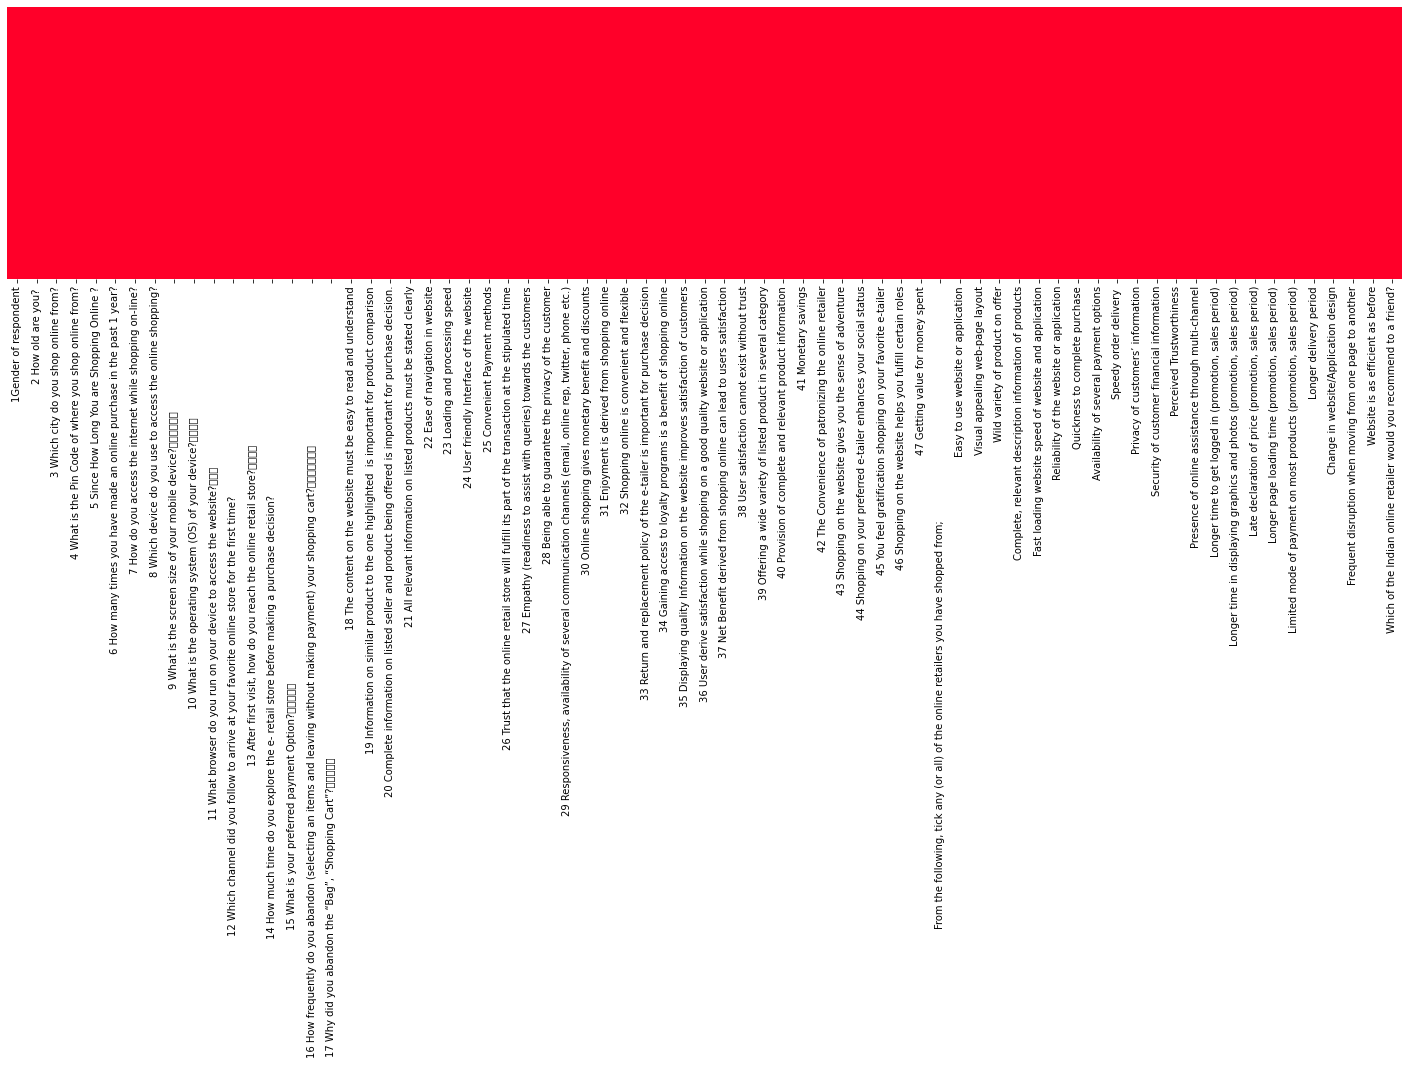

In [11]:
#Seeing the missing values via visualization
plt.figure(figsize=(25,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='gist_rainbow')
plt.show()

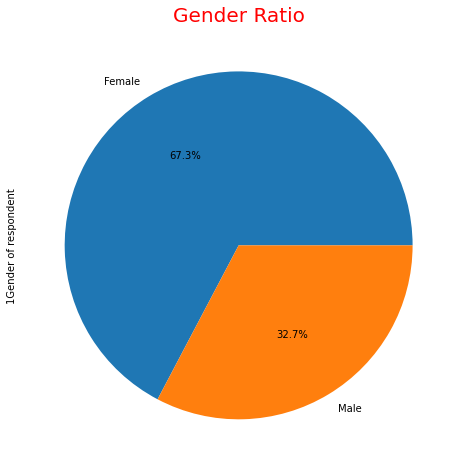

In [12]:
# Check for label
FIGURE_SIZE = (8,8)
plt.title("Gender Ratio", color = 'Red', fontsize = 20)
df['1Gender of respondent'].value_counts().plot.pie(figsize=FIGURE_SIZE, autopct = '%1.1f%%')

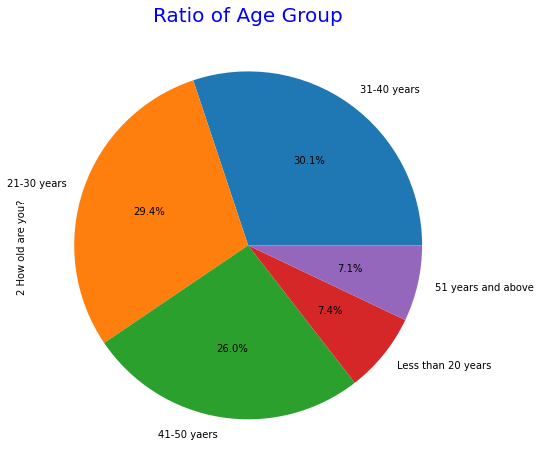

In [13]:
FIGURE_SIZE = (10,8)
plt.title("Ratio of Age Group", color = 'blue', fontsize = 20)
df['2 How old are you? '].value_counts().plot.pie(figsize=FIGURE_SIZE, autopct = '%1.1f%%')

In [14]:

#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 71
>>> Number of categorical features:: 70
>>> Number of Numerical Feature:: 1


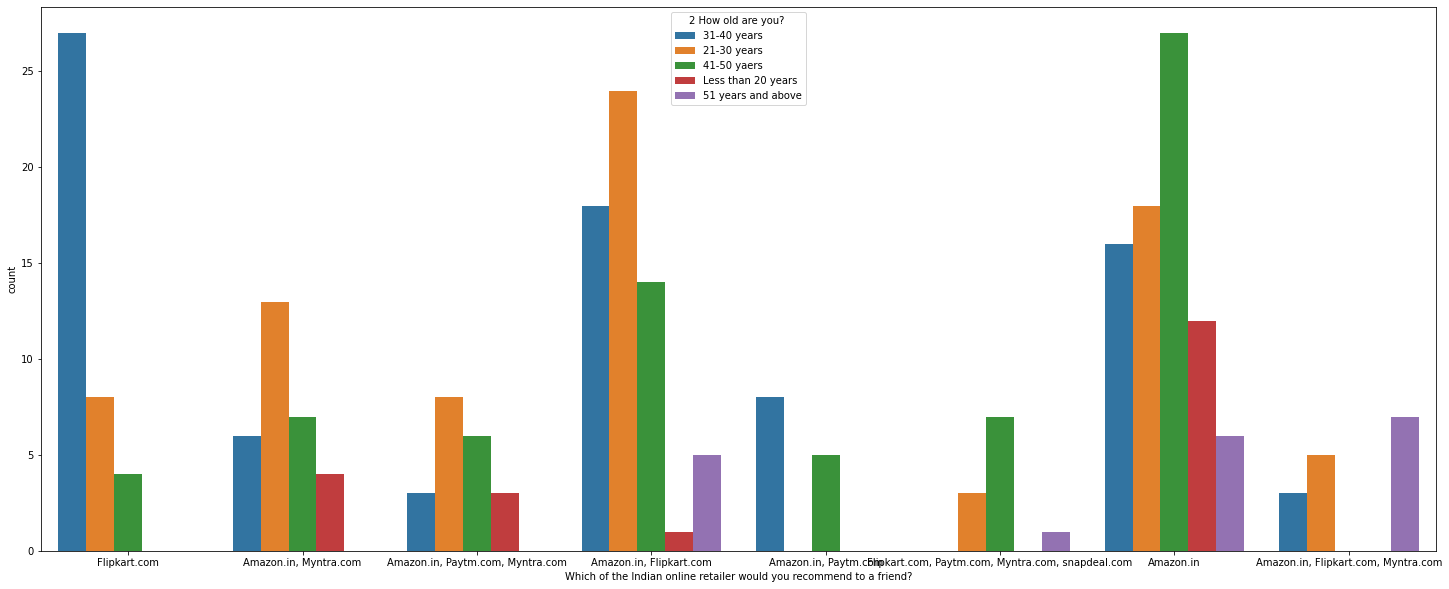

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'],hue=df['2 How old are you? '])

<ipython-input-16-36326d665616>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f=plt.figure(figsize=(16,3))


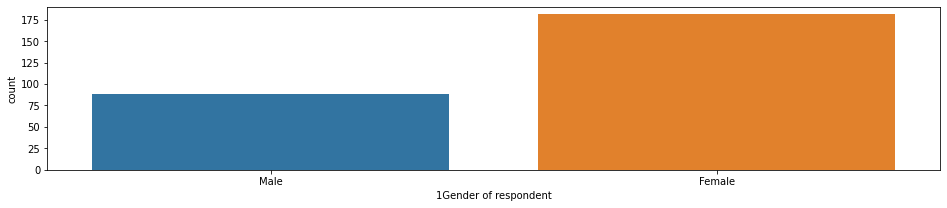

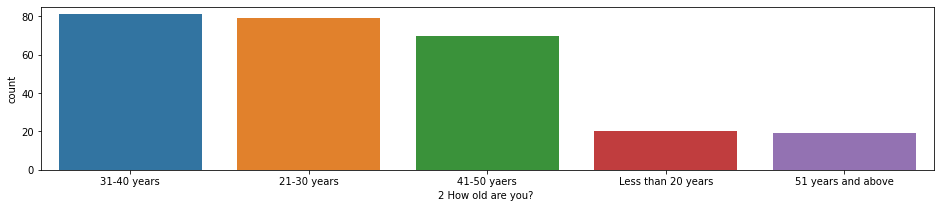

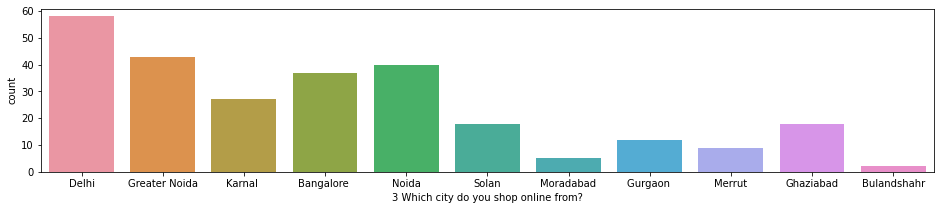

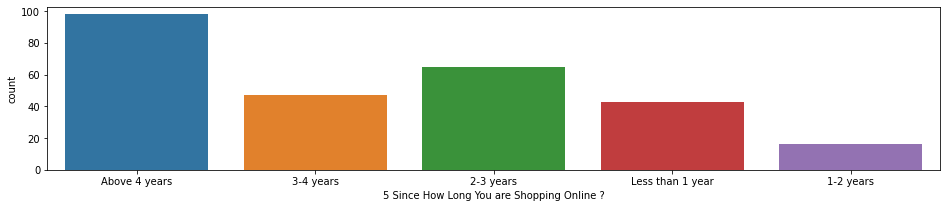

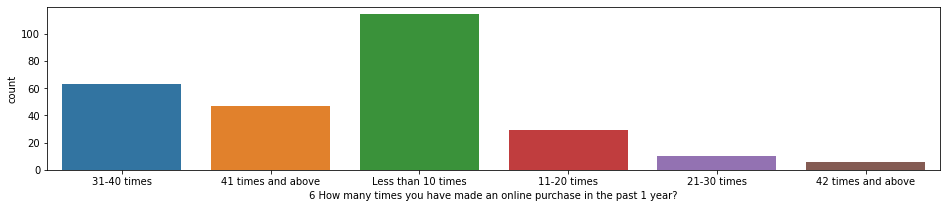

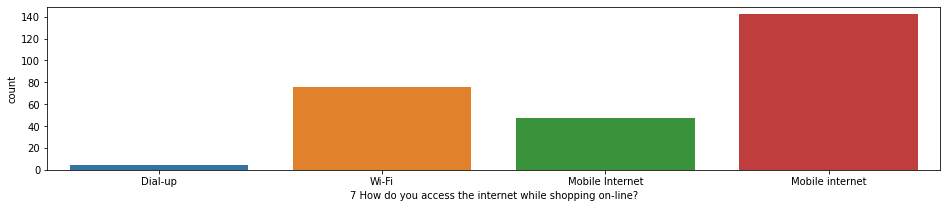

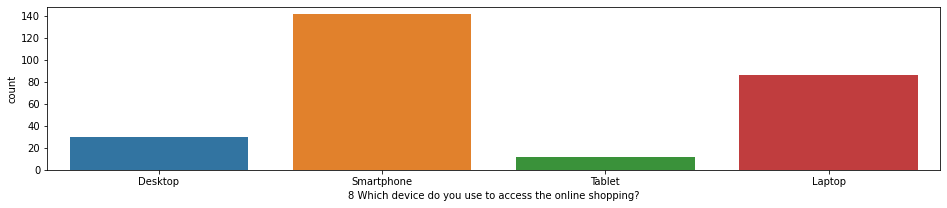

C:\Users\vyasd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vyasd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


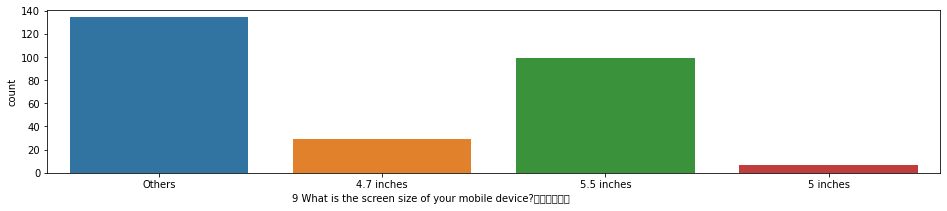

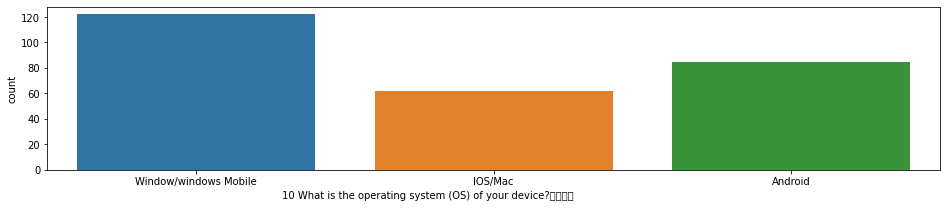

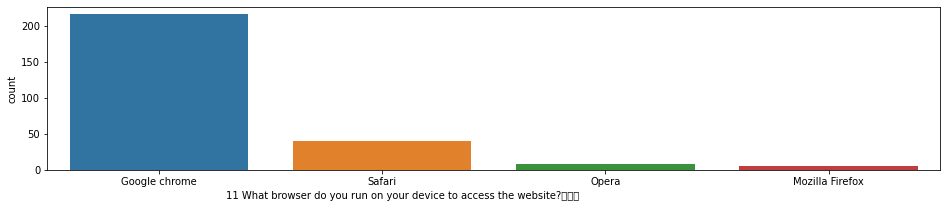

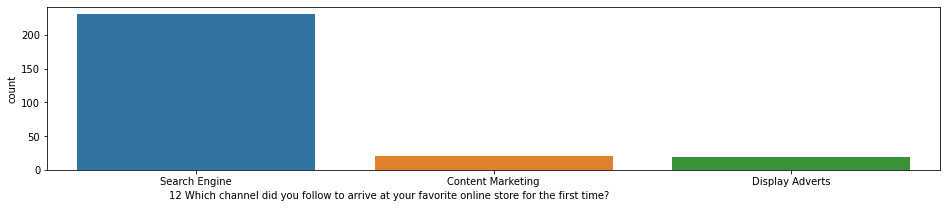

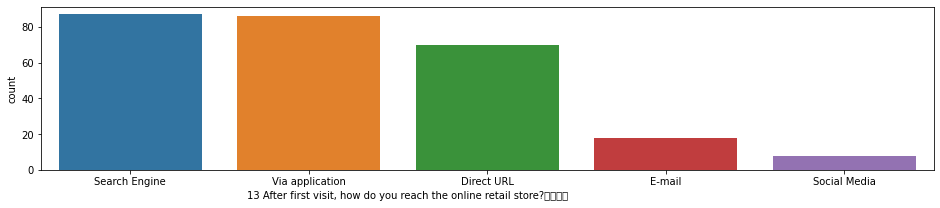

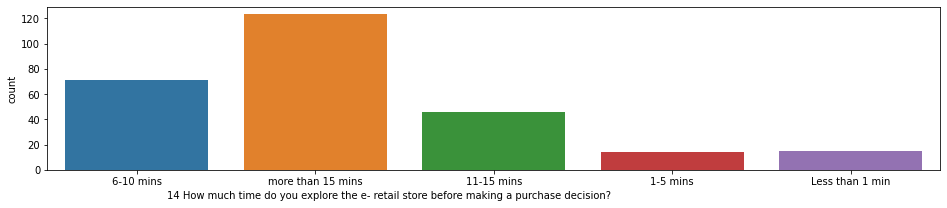

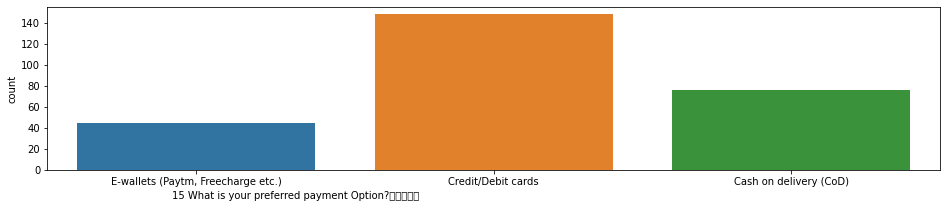

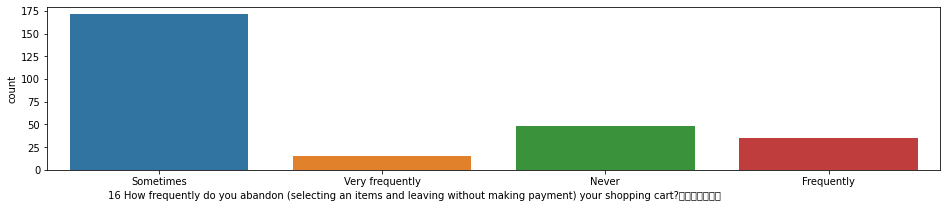

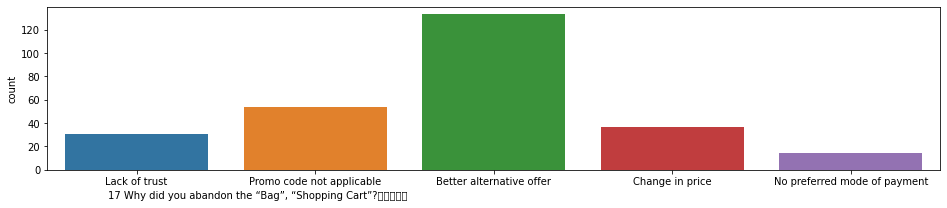

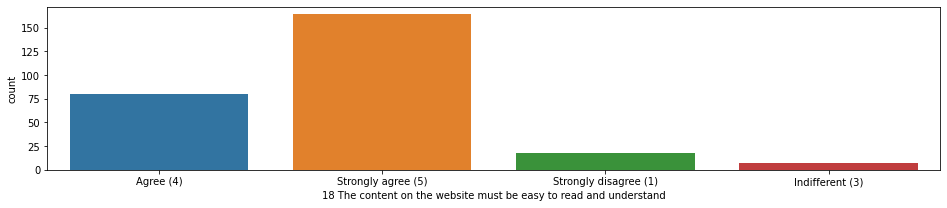

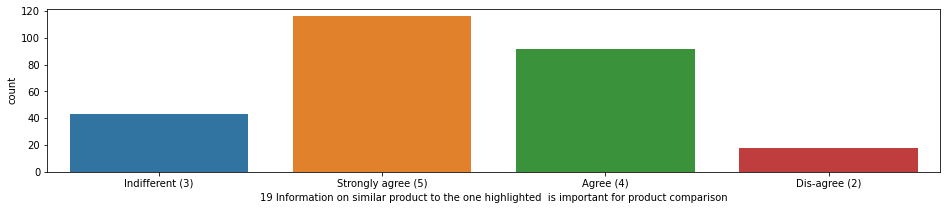

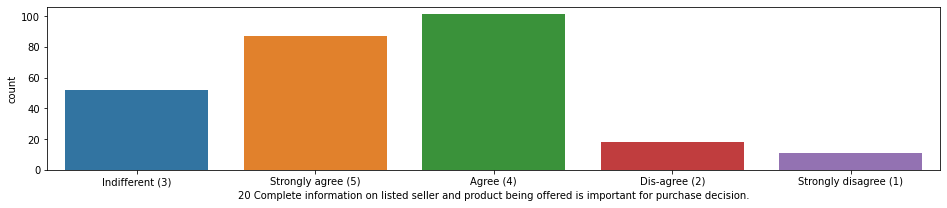

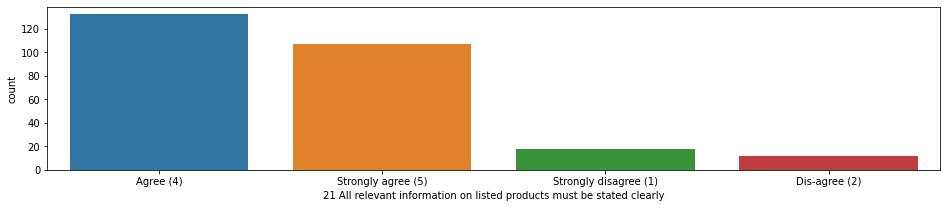

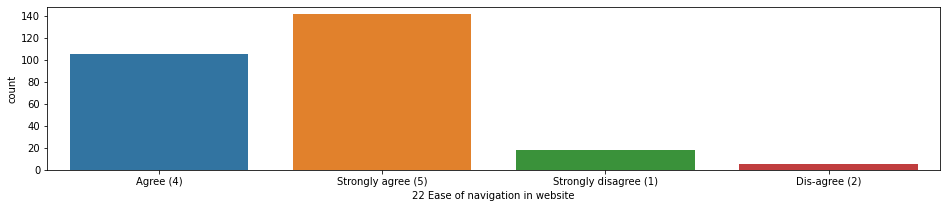

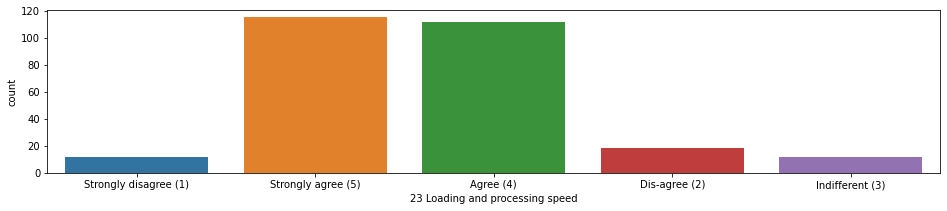

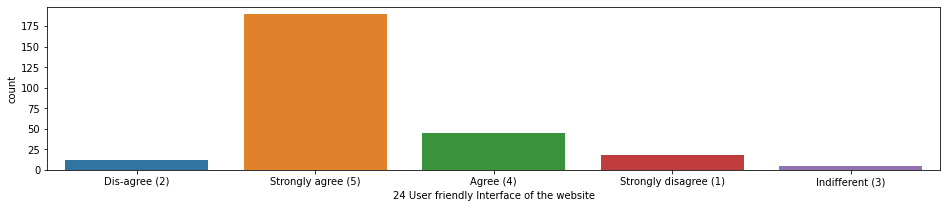

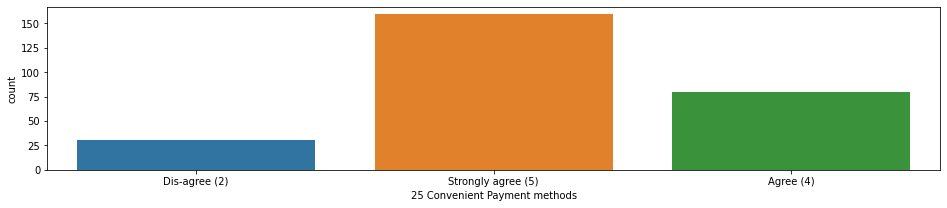

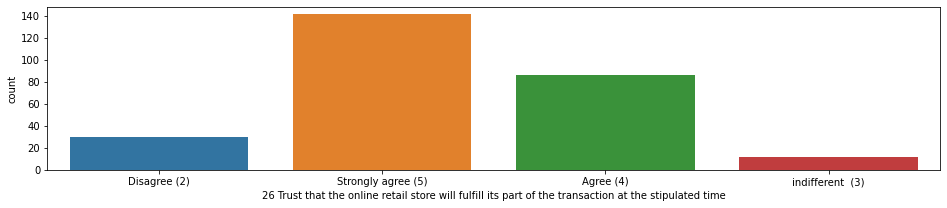

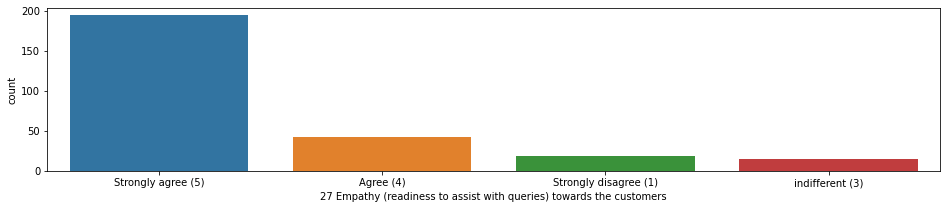

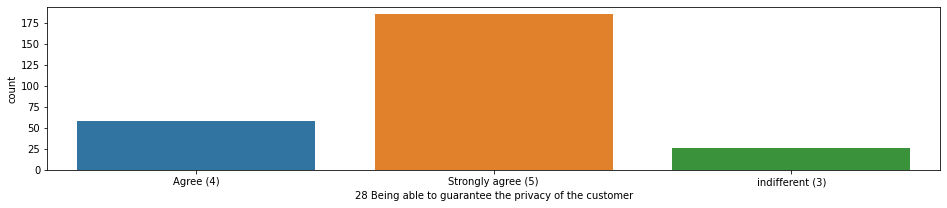

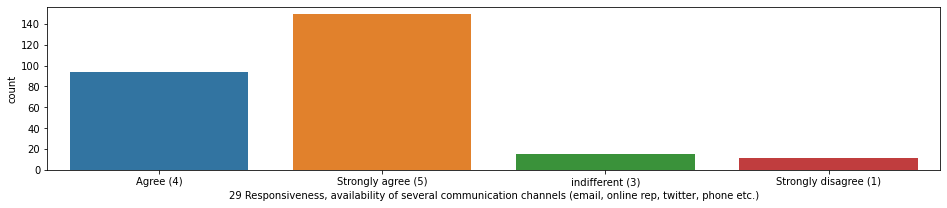

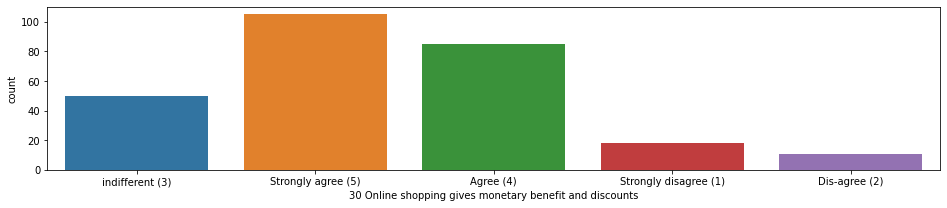

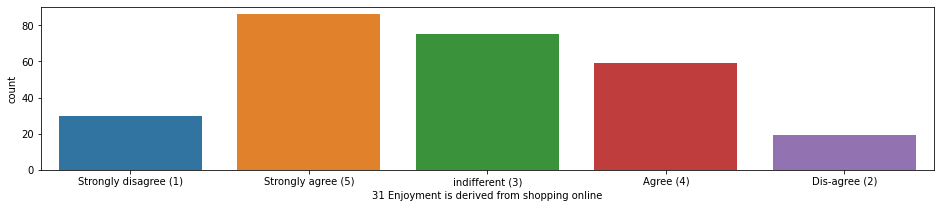

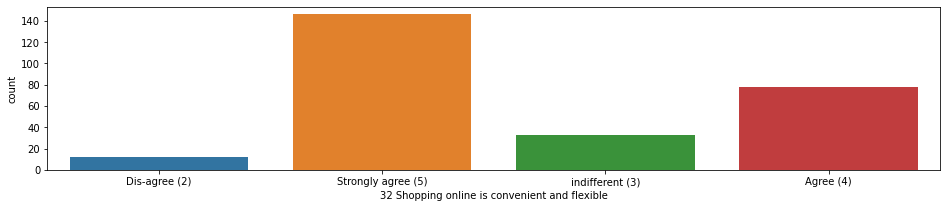

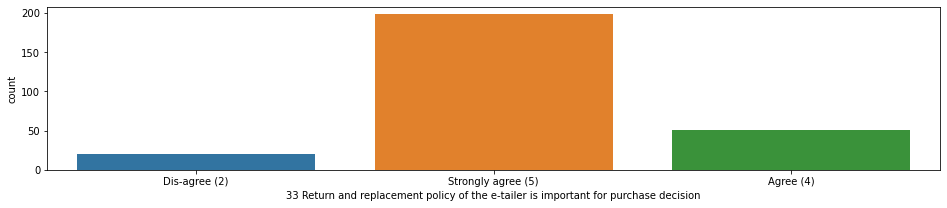

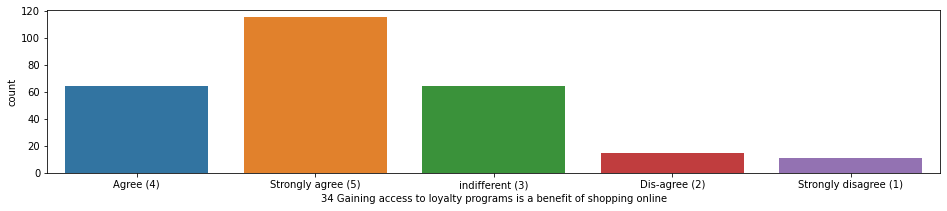

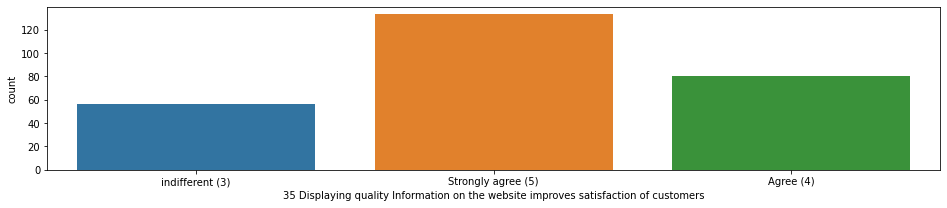

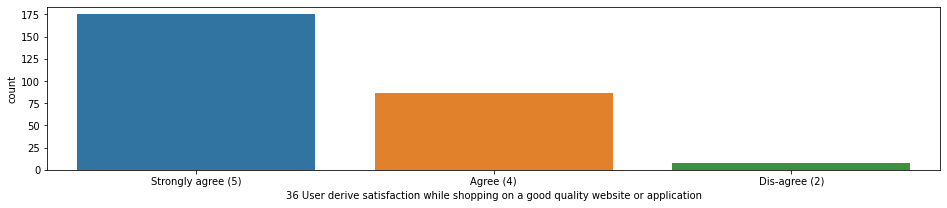

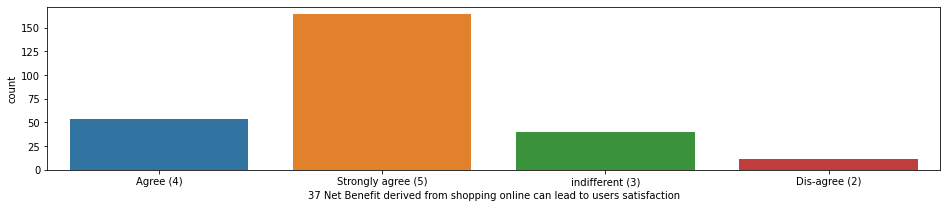

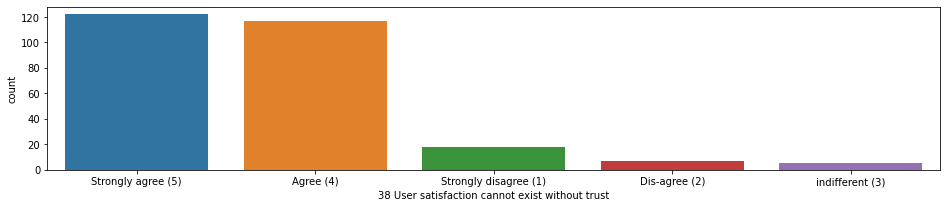

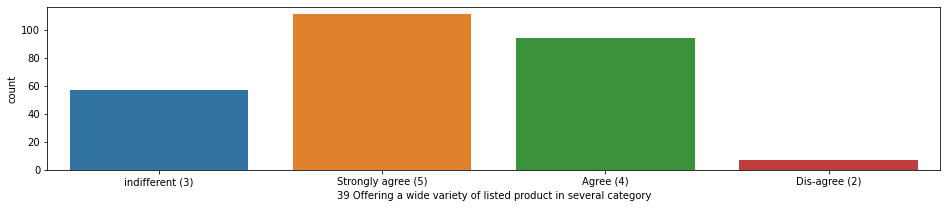

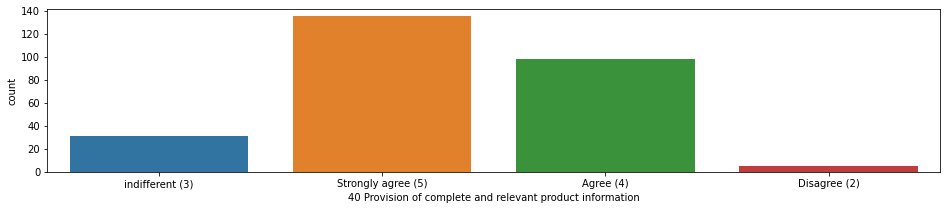

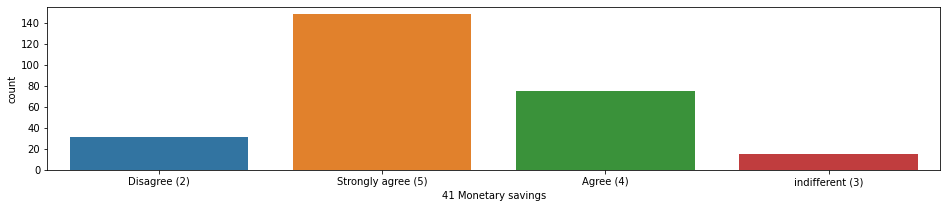

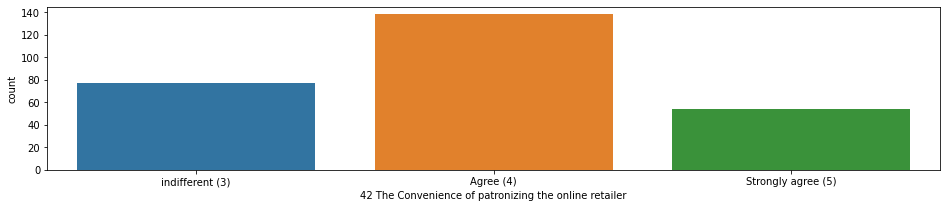

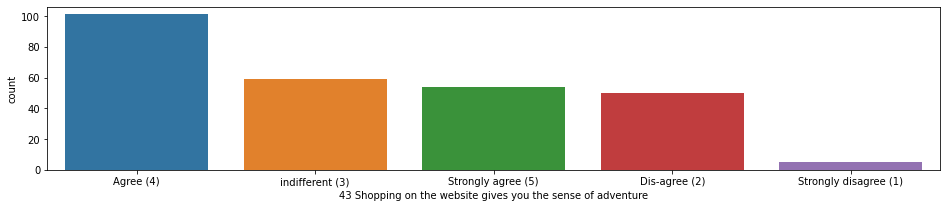

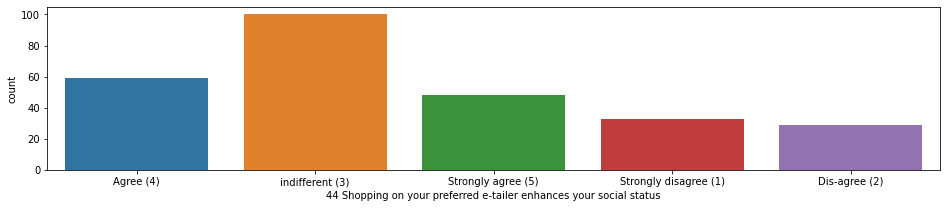

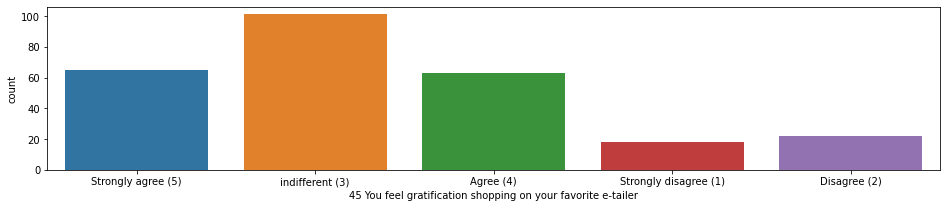

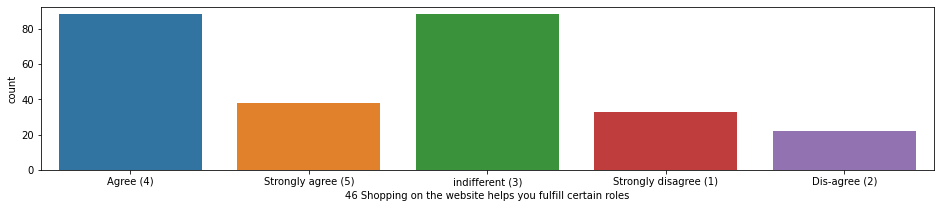

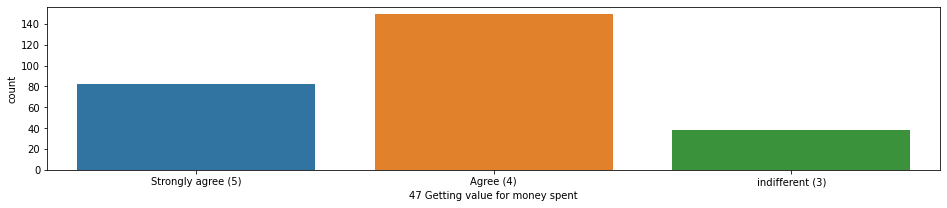

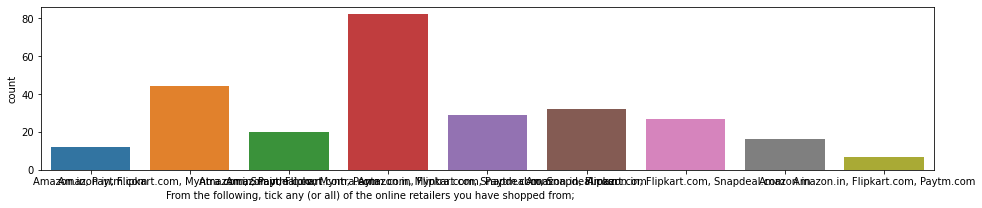

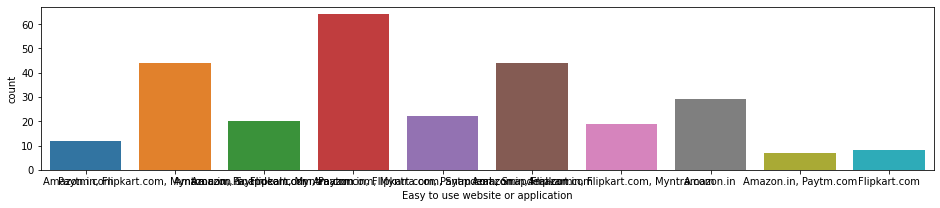

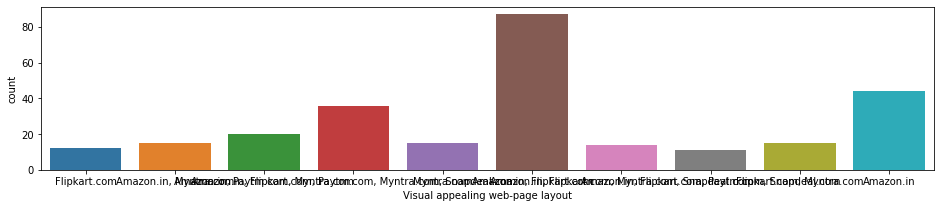

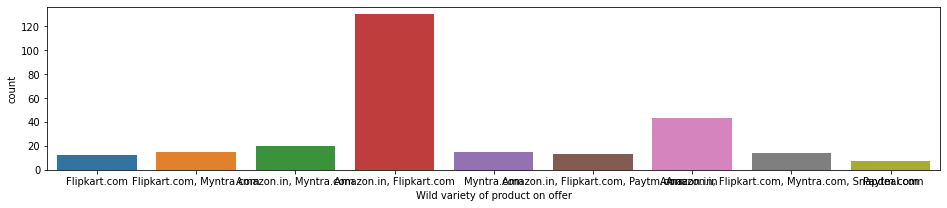

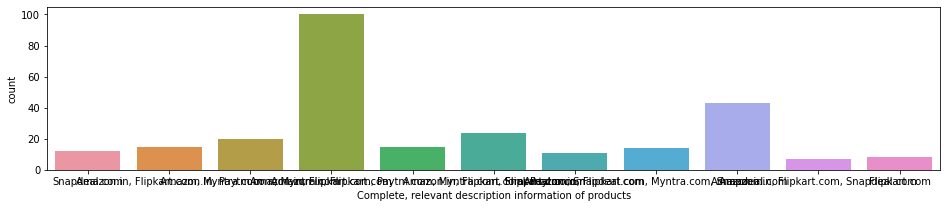

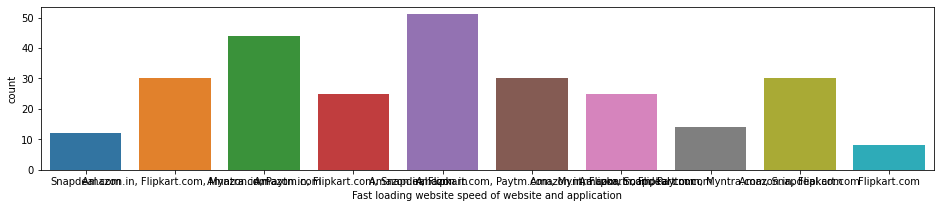

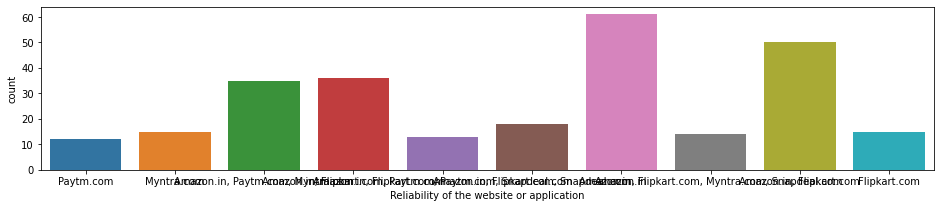

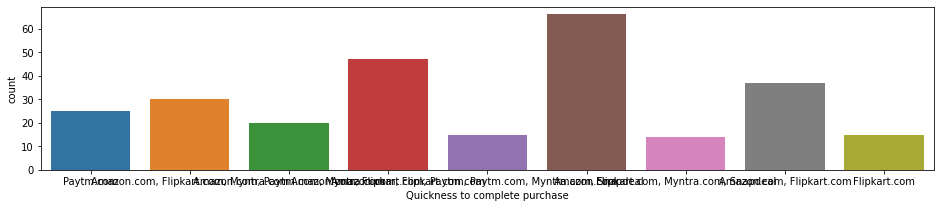

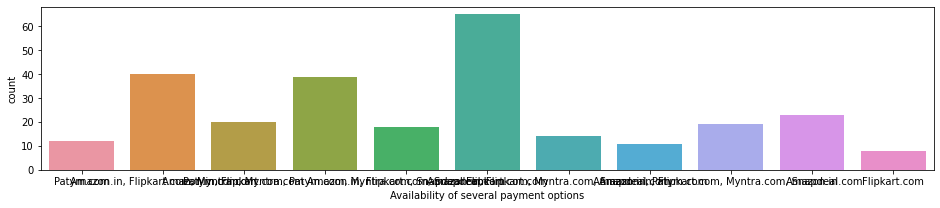

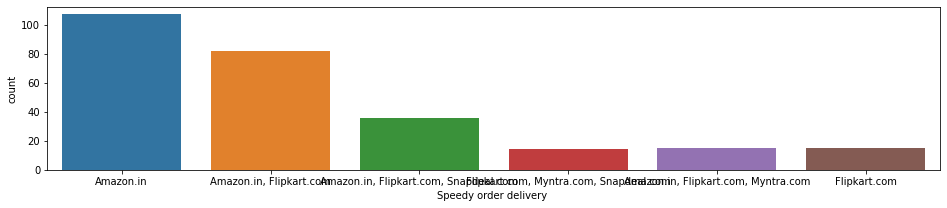

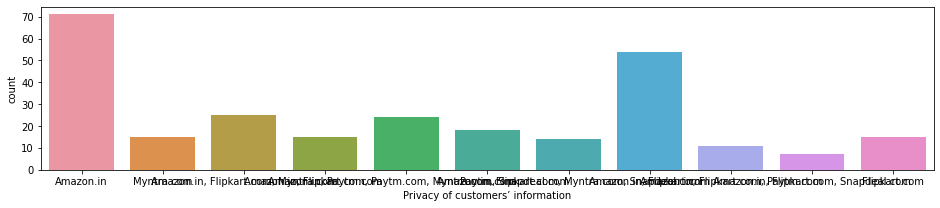

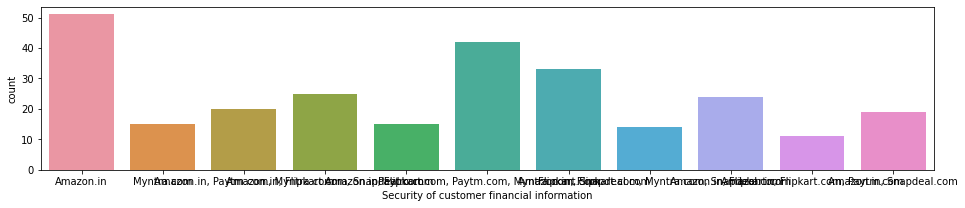

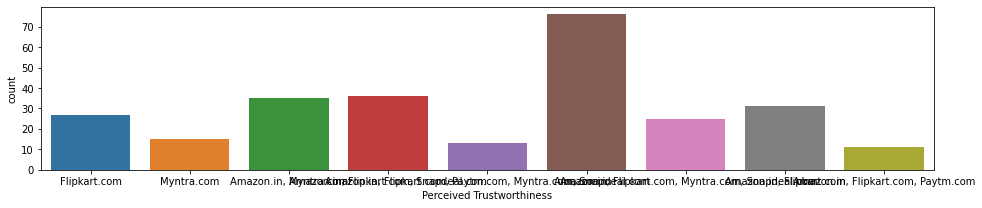

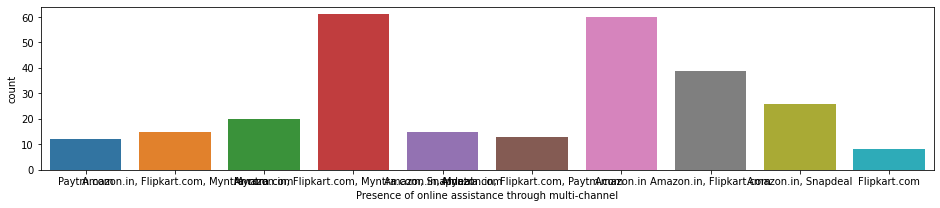

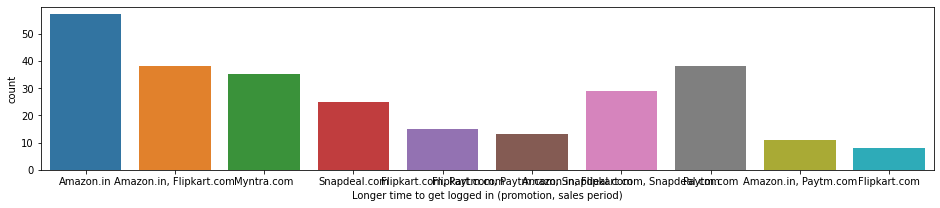

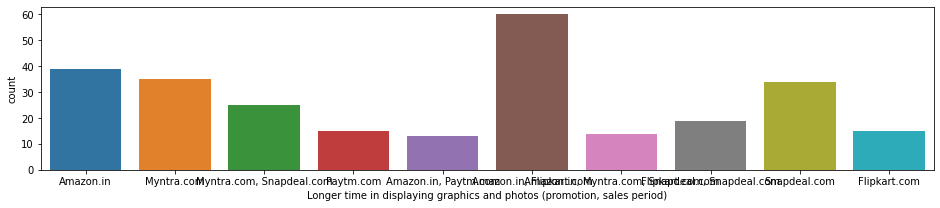

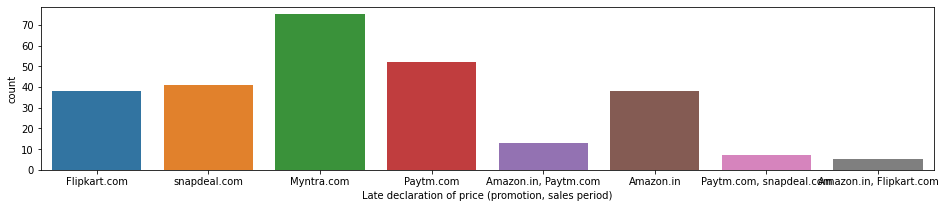

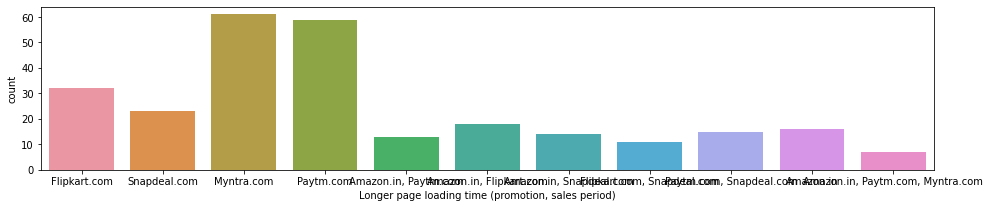

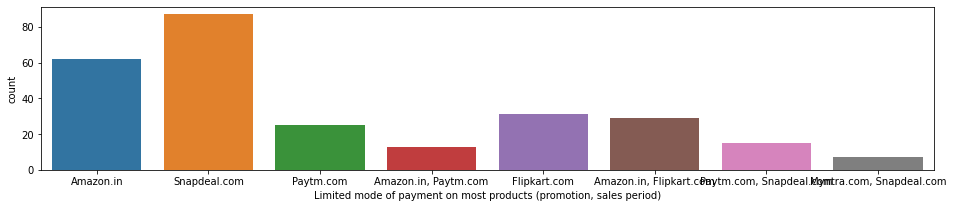

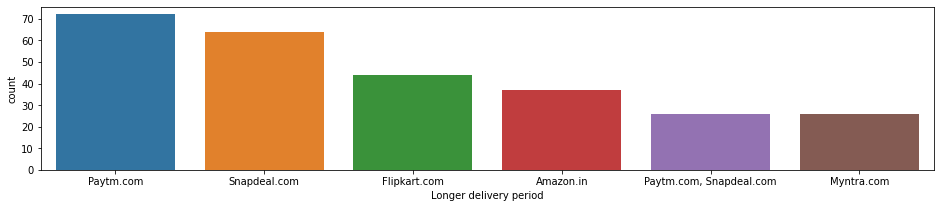

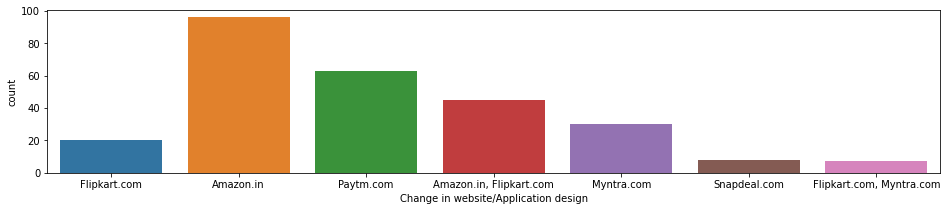

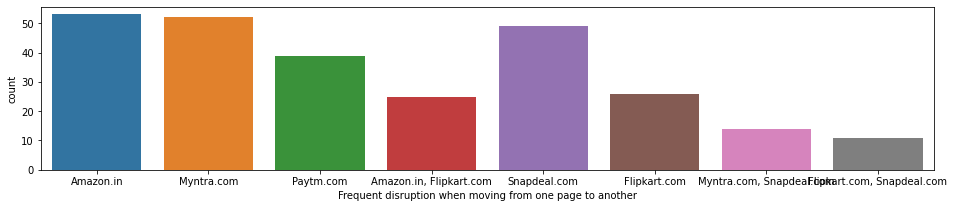

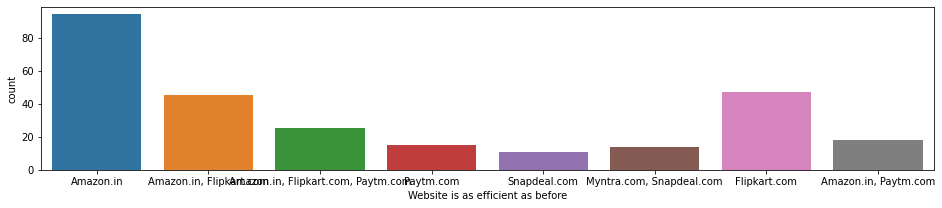

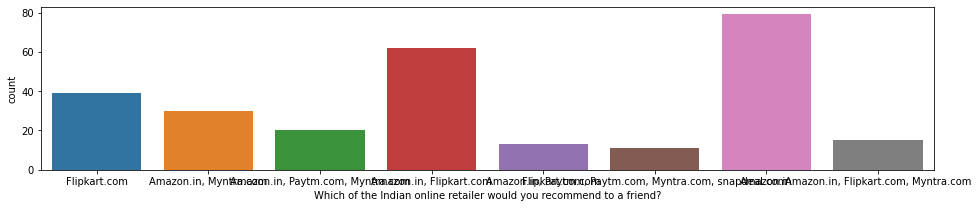

In [16]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

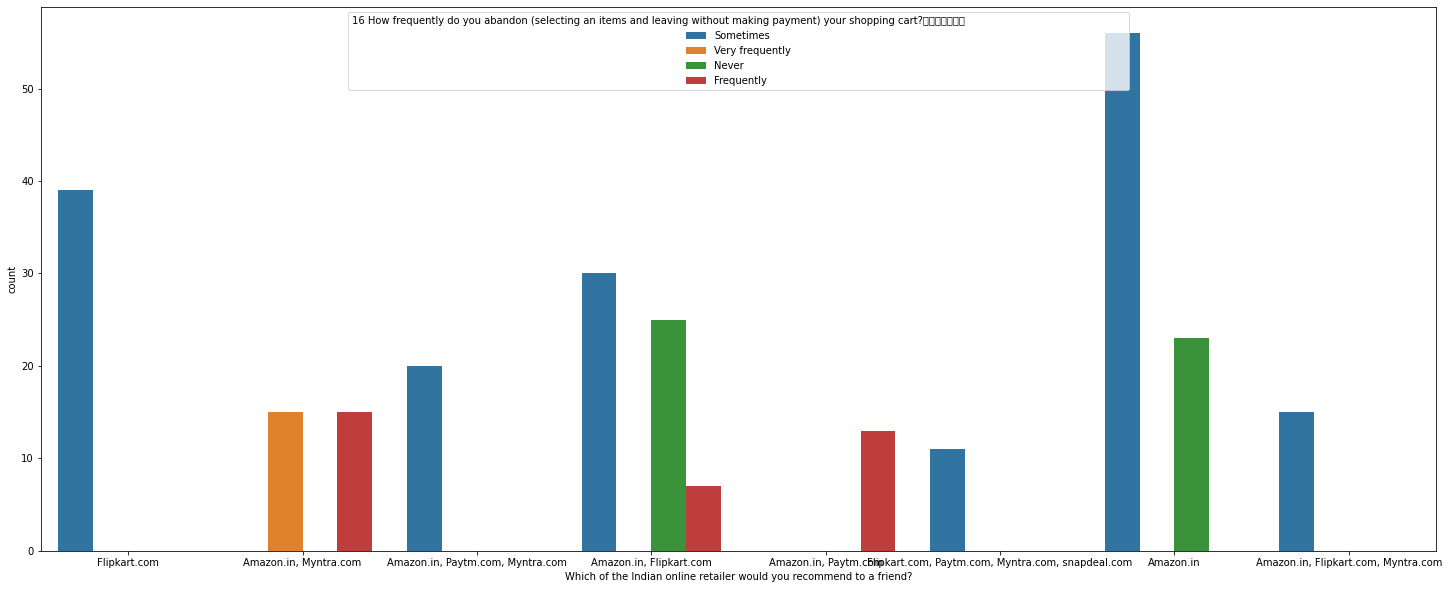

In [17]:
plt.figure(figsize=(25,10))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'],hue=df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '])


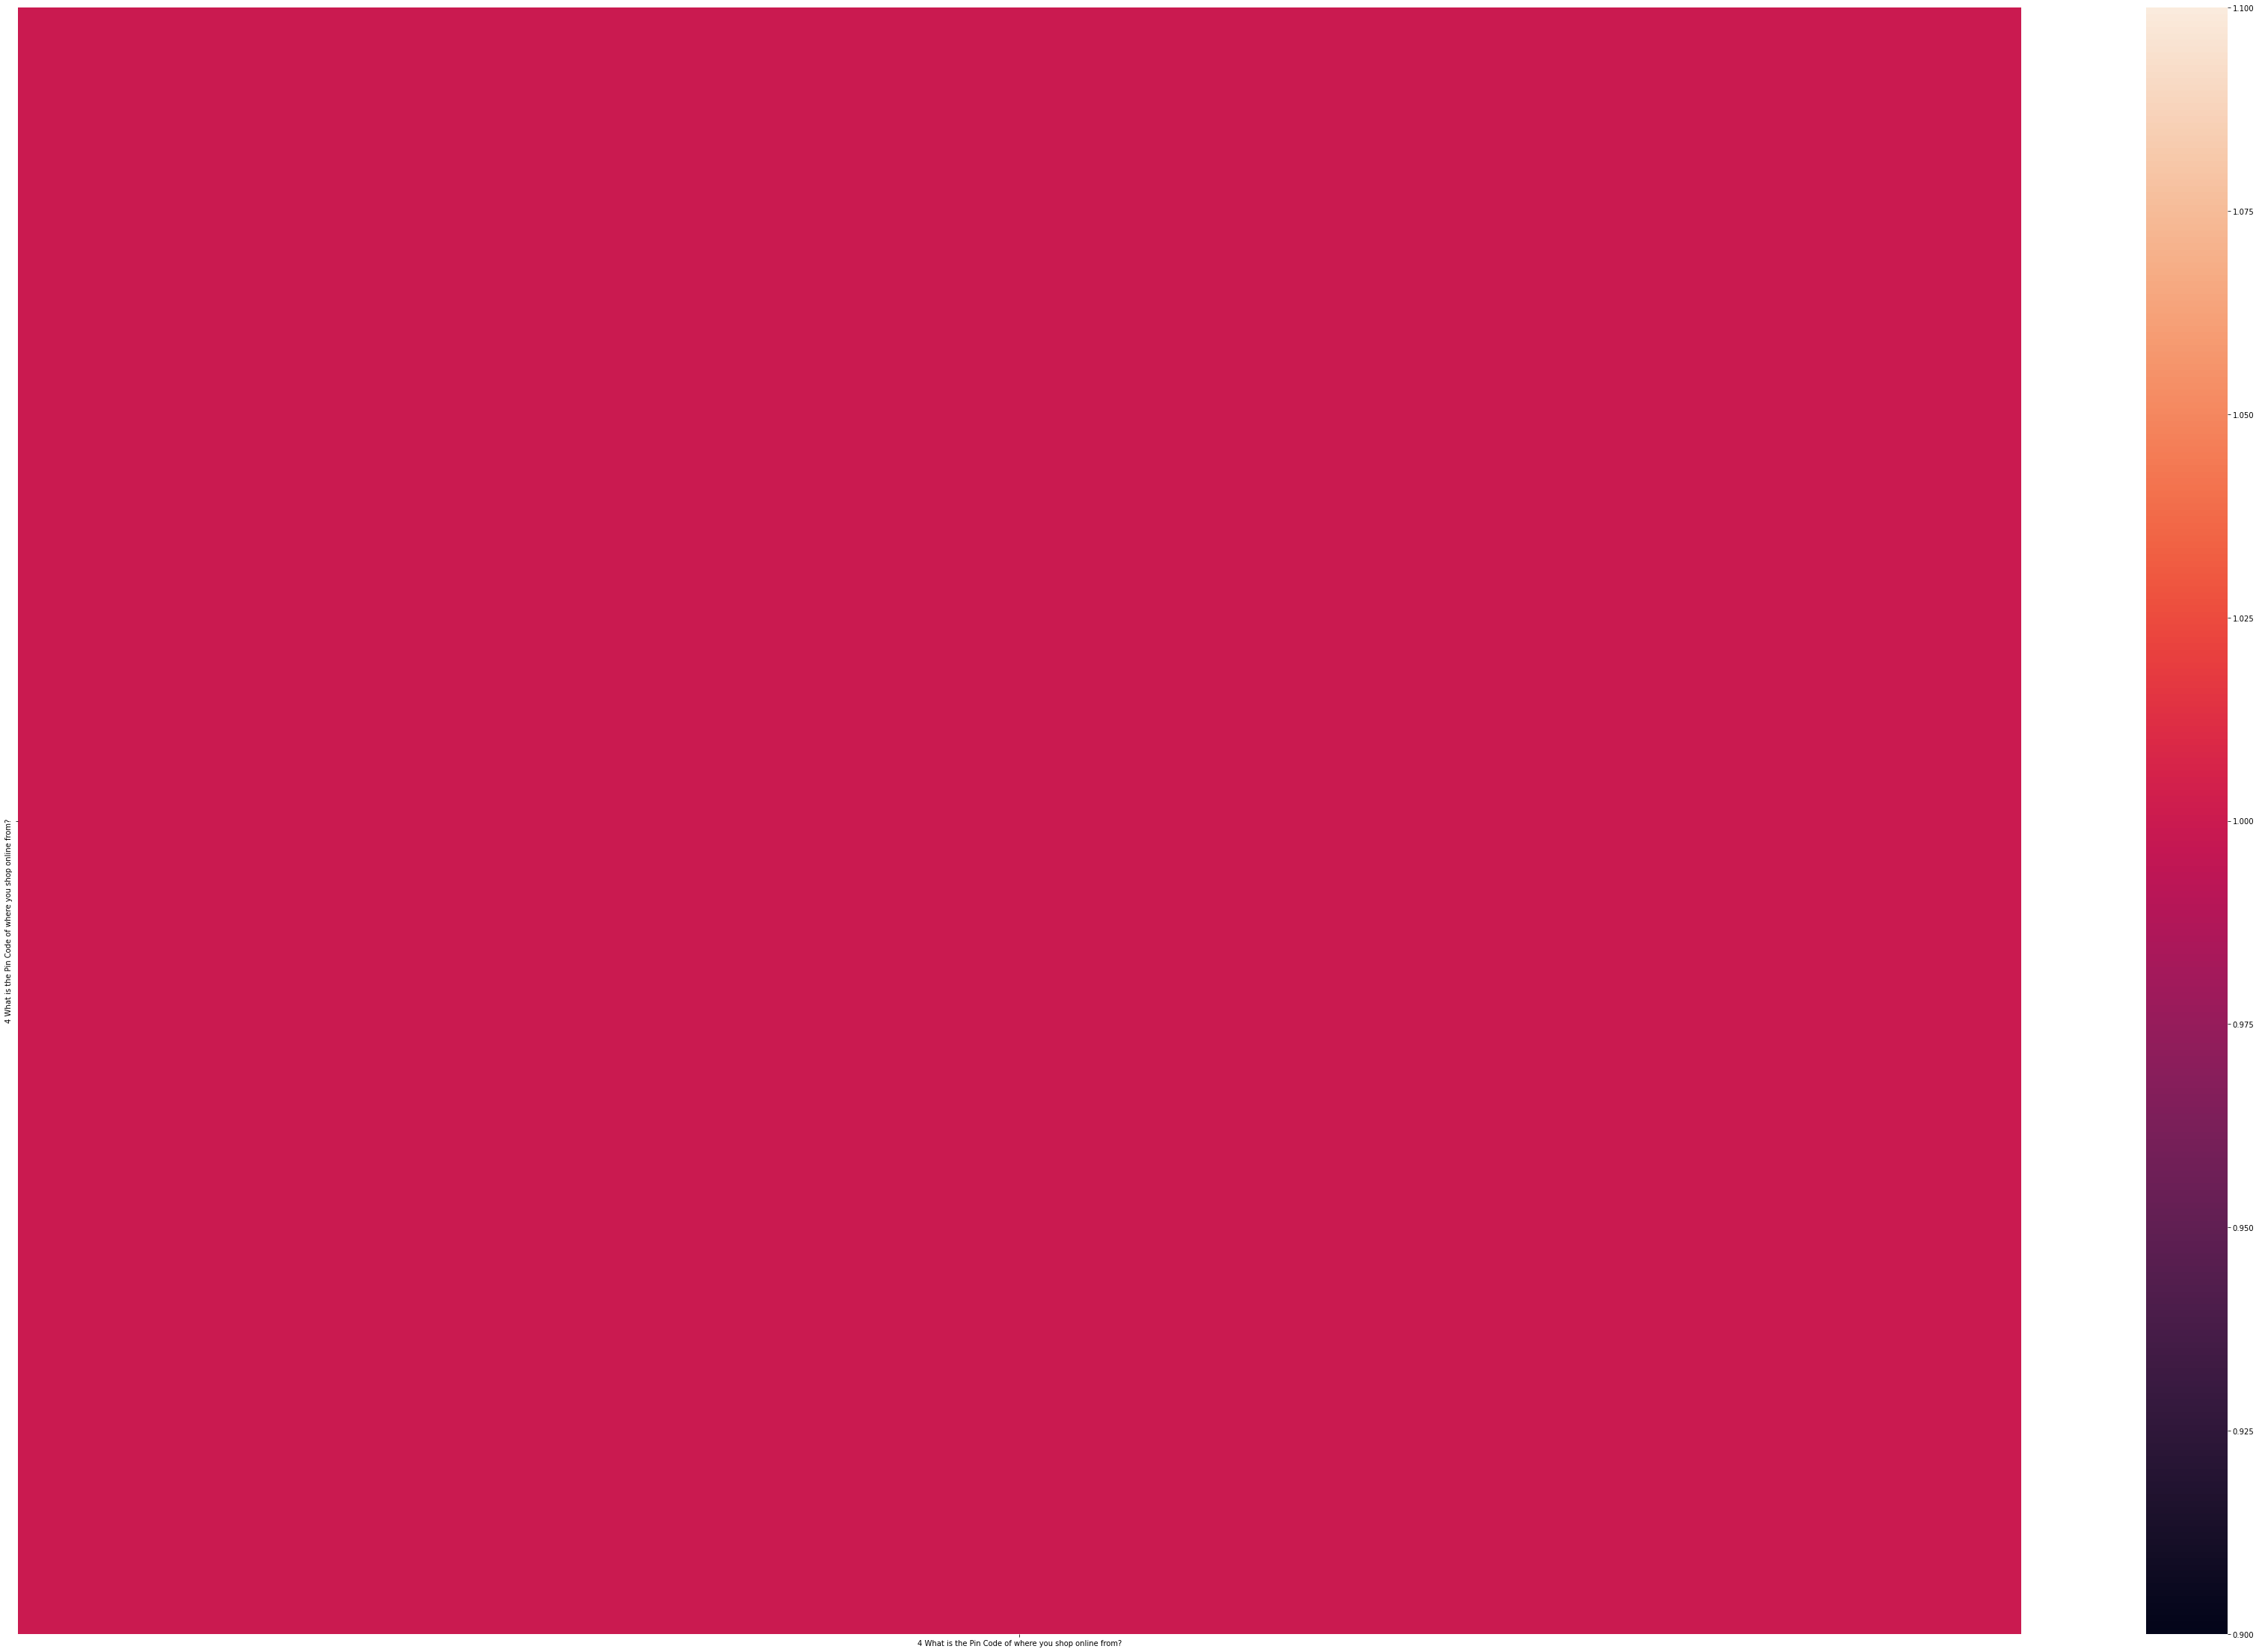

In [18]:
cor = df.corr()
plt.figure(figsize=(60,40))
sns.heatmap(cor)